# Scraping Amazon product reviews

The review URL to be used is the URL you get when you click on `See all reviews` button on the product page in `amazon.in`, below the product details and sample reviews.



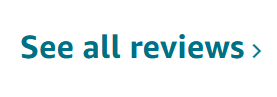

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.notebook import tqdm_notebook

In [ ]:
def scrapeAmazonReviews(url, no_of_pages = 10):
  '''Takes in the review URL of any amazon product and the number of review pages (by default = 10).
     Review URL example : 'https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/product-reviews/B08R6QR863/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
     Returns a dataframe containing name of the customer, rating of the product given, date of review written, the review header, product details reviewed, the main review and how many people found it helpful.'''

  # initializing the lists
  name = []
  ratings = []
  date = []
  review_header = []
  product_details = []
  review_data = []
  helpful = []

  # only amazon page
  assert (url.startswith('https://www.amazon.')), "Only Amazon pages can be scraped using this."
  
  # only review pages
  assert (url.endswith('reviewerType=all_reviews')), "Not the right page. Please use the all reviews page as the URL."

  # scraping through pages
  for i in tqdm_notebook(range(1, no_of_pages + 1), desc = 'Scraping : '):
    URL = f"{url}&pageNumber={i}"
    page = requests.get(URL)

    # if page not found 404 error
    assert (page.status_code != 404), "Error 404 : Page Not Found."

    # keep requesting until successful
    while page.status_code != 200:
      page = requests.get(URL)
      
    scrape = BeautifulSoup(page.content, "html.parser")

    # get all the review cards in a pages
    cards = scrape.find_all('div', class_='a-section review aok-relative')
    # if no cards present in the page, end scraping
    if len(cards) == 0:
      print('Reached end of reviews.')
      break

    # scraping through review cards
    for card in cards:
      # try except used to add None values if value for one product review doesnt exist
      try:
        name.append(card.find('span', class_='a-profile-name').text)
      except:
        name.append(None)

      try:
        ratings.append(int(card.find('span', class_="a-icon-alt").text[0]))
      except:
        ratings.append(None)
      
      try:
        review_header.append(card.find('a', class_="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold").findChild().text)
      except:
        review_header.append(None)
      
      try:
        date.append(card.find('span', class_="a-size-base a-color-secondary review-date").text[24:])
      except:
        date.append(None)

      try:
        product_details.append(card.find('a', attrs={'class':"a-size-mini a-link-normal a-color-secondary", 'data-hook':'format-strip'}).text)
      except:
        product_details.append(None)

      try:
        review_data.append(card.find('span', attrs={'class':"a-size-base review-text review-text-content", 'data-hook':'review-body'}).findChild('span').text)
      except:
        review_data.append(None)

      try:
        helpful.append(card.find('span', class_="a-size-base a-color-tertiary cr-vote-text").text)
      except:
        helpful.append(None)

  # converting into dictionary
  reviews = {
      'Name': name,
      'Ratings' : ratings,
      'Header' : review_header,
      'Date' : date,
      'Product_Details' : product_details,
      'Review' : review_data,
      'Helpful' : helpful
  }

  # creating a dataframe
  df = pd.DataFrame(reviews)

  return df

In [ ]:
url = "https://www.amazon.in/boAt-BassHeads-100-Headphones-Black/product-reviews/B071Z8M4KX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [ ]:
reviews_df = scrapeAmazonReviews(url, 1000)
reviews_df

Scraping :   0%|          | 0/1000 [00:00<?, ?it/s]

,Name,Ratings,Header,Date,Product_Details,Review,Helpful
0,Amazon Customer,4,Good for One Year,7 October 2022,Colour: BlackStyle name: 2020,"Able to use exactly One year after that, only ...",2 people found this helpful
1,Ankit Bisht,4,Better than expected,8 October 2022,Colour: BlackStyle name: 2020,It's been 2 month since I bought these earphon...,One person found this helpful
2,AMIR ANSARI,4,Product packaging is too old.,6 October 2022,Colour: BlackStyle name: 2020,As per online pic model is changed. It is Refu...,None
3,Pratyush Sharma,4,Issue with comfort,14 September 2022,Colour: BlackStyle name: 2020,I'll say product is fine 🙂 and all.I been usin...,4 people found this helpful
4,Arsalan A.,4,Superb quality earphone,8 October 2022,Colour: Furious RedStyle name: 2020,Noise cancellation is not that good but overal...,None
...,...,...,...,...,...,...,...
4995,Aakriti Jain,2,Received damaged product,13 April 2022,Colour: BlackStyle name: 2020,Received used headphones even after replacemen...,None
4996,Mithilesh,5,"Good build quality, sound quality and enduranc...",20 December 2020,Colour: BlackStyle name: 2020,For the price range it is an Excellent product...,None
4997,Pankaj Bawdekar,5,Better product at low price rate,11 July 2021,Colour: BlackStyle name: 2020,If your only purpose is to listen songs then i...,None
4998,prashant varadkar,4,Compare to price it worth,22 July 2021,Colour: Courageous OrangeStyle name: Made in I...,Sound quality good,None


In [ ]:
# saving to a csv file
reviews_df.to_csv('Reviews.csv', index=False)

# The End